In [1]:
import torch
from torchvision.transforms import v2
from matplotlib import pyplot as plt

from dataset import UltrasonicDataset

import random

In [2]:
transforms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomVerticalFlip(p=0.5),
    v2.RandomRotation(degrees=(0, 15)),
    v2.RandomAffine(degrees=(0, 15), translate=(0.1, 0.1), scale=(0.9, 1.1), shear=(-10, 10, -10, 10)),
    v2.RandomResizedCrop(256, scale=(0.8, 1.0), antialias=True),
])

dataset = UltrasonicDataset(root="datasets/BUSI/train", transforms=transforms)
print(len(dataset))


624


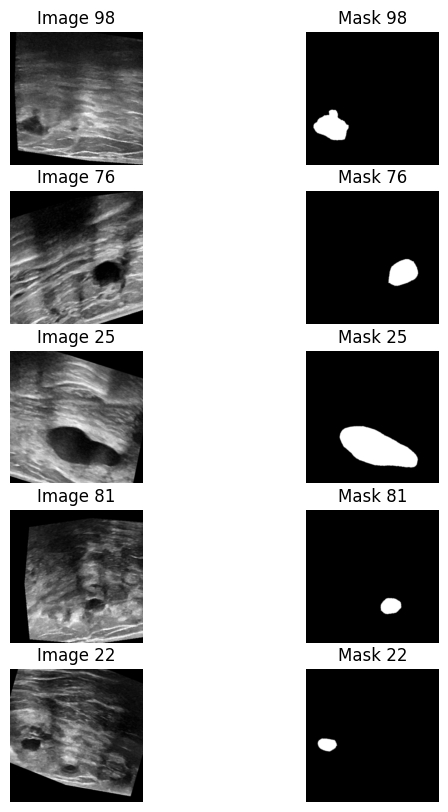

In [9]:
# plot random images with masks and labels

indeces = random.sample(range(len(dataset)), 5)

fig, axs = plt.subplots(5, 2, figsize=(7, 10))

for i, idx in enumerate(indeces):
    image, mask = dataset[idx]
    axs[i, 0].imshow(image[0], cmap="gray")
    axs[i, 1].imshow(mask[0], cmap="gray")
    axs[i, 0].set_title(f"Image {idx}")
    axs[i, 1].set_title(f"Mask {idx}")

    axs[i, 0].axis("off")
    axs[i, 1].axis("off")

In [14]:
transforms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomVerticalFlip(p=0.5),
    v2.RandomRotation(degrees=(0, 15)),
    v2.RandomAffine(degrees=(0, 15), translate=(0.1, 0.1), scale=(0.9, 1.1), shear=(-10, 10, -10, 10)),
    v2.RandomResizedCrop(128, scale=(0.8, 1.0)),
])


dataset_2 = CT2US(root="datasets/CT2US", transforms=transforms)

print(len(dataset_2))

4586


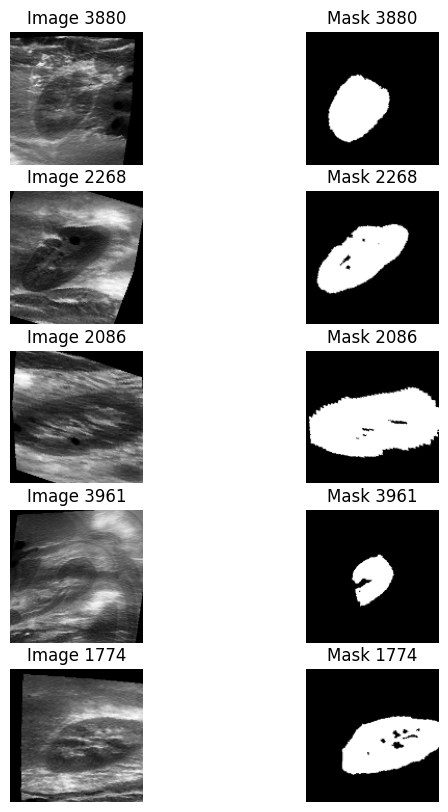

In [19]:
# plot random images with masks and labels

indeces = random.sample(range(len(dataset_2)), 5)

fig, axs = plt.subplots(5, 2, figsize=(7, 10))

for i, idx in enumerate(indeces):
    image, mask = dataset_2[idx]
    axs[i, 0].imshow(image[0], cmap="gray")
    axs[i, 1].imshow(mask[0], cmap="gray")
    axs[i, 0].set_title(f"Image {idx}")
    axs[i, 1].set_title(f"Mask {idx}")

    axs[i, 0].axis("off")
    axs[i, 1].axis("off")

In [16]:
from models.get_model import get_model
from torchinfo import summary

model = get_model("Segformer", 256)

summary(model, (1, 1, 256, 256))


Layer (type:depth-idx)                                                      Output Shape              Param #
SegformerForSemanticSegmentation                                            [1, 2, 64, 64]            --
├─SegformerModel: 1-1                                                       [1, 256, 8, 8]            --
│    └─SegformerEncoder: 2-1                                                [1, 256, 8, 8]            --
│    │    └─ModuleList: 3-10                                                --                        (recursive)
│    │    └─ModuleList: 3-11                                                --                        (recursive)
│    │    └─ModuleList: 3-12                                                --                        (recursive)
│    │    └─ModuleList: 3-10                                                --                        (recursive)
│    │    └─ModuleList: 3-11                                                --                        (recursive)
│    